# Daily Forecast

In [5]:
# Required imports
import pandas as pd
import matplotlib.pyplot as plt

# Modeling Package
from neuralprophet import NeuralProphet

In [6]:
df = pd.read_csv('daily10.csv')

In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15134 entries, 0 to 15133
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    15134 non-null  object 
 1   DGS10   15134 non-null  float64
dtypes: float64(1), object(1)
memory usage: 354.7+ KB


In [9]:
df.columns = ['ds', 'y']
list(df.columns.values)

['ds', 'y']

In [10]:
df.head()

,ds,y
0,1962-01-02,4.06
1,1962-01-03,4.03
2,1962-01-04,3.99
3,1962-01-05,4.02
4,1962-01-08,4.03


In [11]:
df.tail()

,ds,y
15129,2022-07-29,2.67
15130,2022-08-01,2.60
15131,2022-08-02,2.75
15132,2022-08-03,2.73
15133,2022-08-04,2.68


In [12]:
df.describe()

,y
count,15134.000000
mean,5.917662
std,2.991646
min,0.520000
25%,3.900000
50%,5.720000
75%,7.670000
max,15.840000


In [13]:
m = NeuralProphet(
    seasonality_mode='multiplicative')
#, 
#    n_changepoints=12, 
#   num_hidden_layers=2)    

In [14]:
metrics = m.fit(df, freq="M")

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.579% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency M is different than major frequency B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 92


  0%|          | 0/154 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.82E-02, min: 5.08E-01


  0%|          | 0/154 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.08E-02, min: 5.08E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 6.66E-02
Epoch[92/92]: 100%|█| 92/92 [00:29<00:00,  3.17it/s, SmoothL1Loss=0.00206, MAE=0


In [15]:
future = m.make_future_dataframe(df=df, periods=30)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.579% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency M is different than major frequency B


In [16]:
forecast = m.predict(df=future)

INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to 90.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M
INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to 90.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M


In [17]:
forecast.head()

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2022-08-31,None,1.717145,NaN,1.904451,0.007074,-0.142366
1,2022-09-30,None,1.701676,NaN,1.897420,0.000486,-0.142596
2,2022-10-31,None,1.687796,NaN,1.890154,-0.005925,-0.141765
3,2022-11-30,None,1.665066,NaN,1.883123,-0.017602,-0.142366
4,2022-12-31,None,3.122246,NaN,1.875857,-0.015606,0.934870


### Plotting

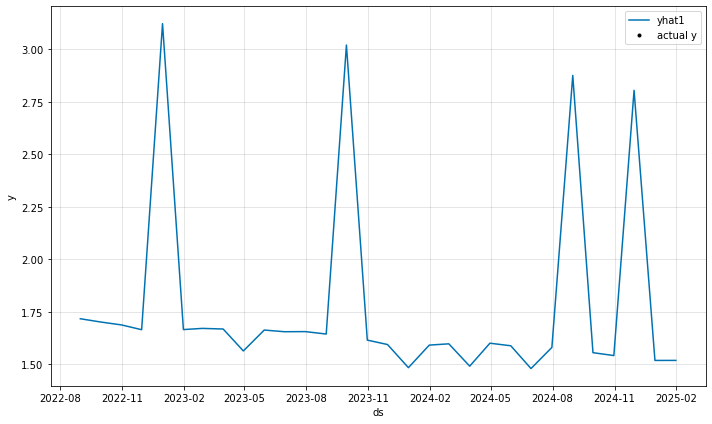

In [18]:
fig_forecast = m.plot(forecast)

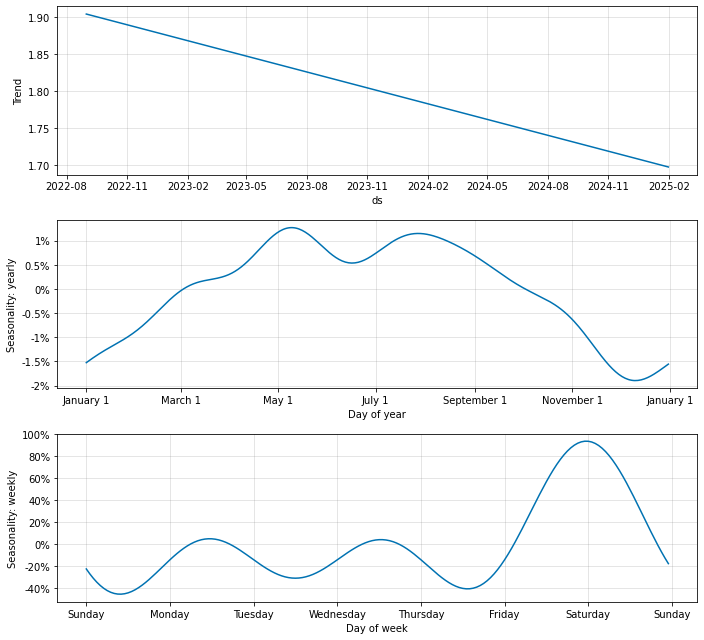

In [19]:
fig_comp = m.plot_components(forecast)

#### February, April, June, August, October, and December has downward seasonality.

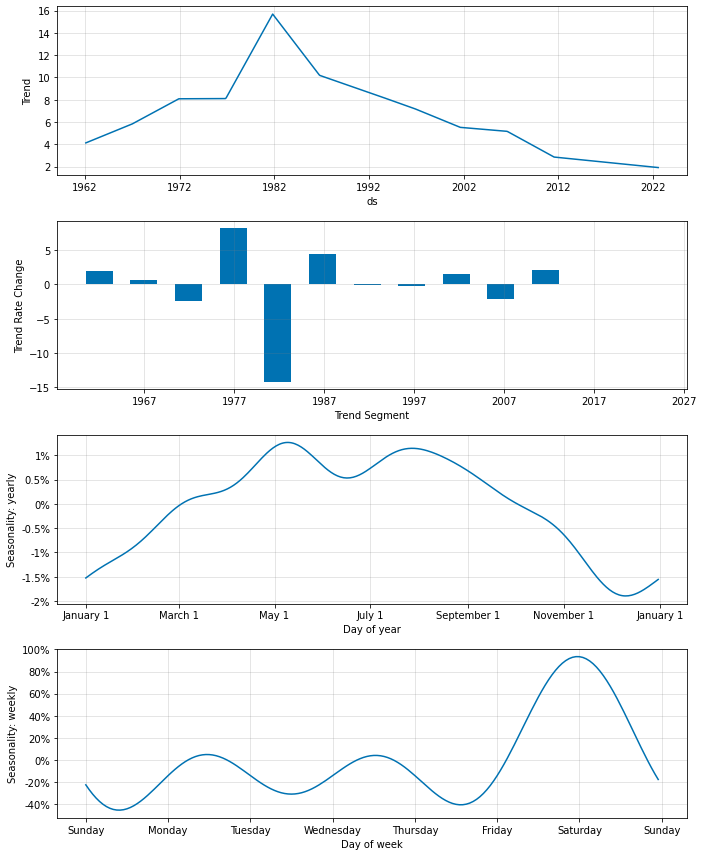

In [20]:
fig_param = m.plot_parameters()

## Validation

In [21]:
# Manual Split
m = NeuralProphet()
df_train, df_test = m.split_df(df, valid_p=0.2)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.579% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B


In [22]:
train_metrics = m.fit(df_train)
test_metrics = m.test(df_test)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.548% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 98


  0%|          | 0/152 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.38E-01, min: 3.24E+00


  0%|          | 0/152 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.38E-01, min: 3.71E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.24E-01
Epoch[98/98]: 100%|█| 98/98 [00:24<00:00,  3.95it/s, SmoothL1Loss=0.00233, MAE=0
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.671% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE   RMSE
1         0.003  0.670  0.794


In [23]:
# Builtin Function

m = NeuralProphet()
metrics = m.fit(df_train, validation_df=df_test)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.548% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 98


  0%|          | 0/152 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.05E-02, min: 2.46E+00


  0%|          | 0/152 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.27E-02, min: 1.08E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 6.83E-02
Epoch[98/98]: 100%|█| 98/98 [00:25<00:00,  3.85it/s, SmoothL1Loss=0.00233, MAE=0


Text(0.5, 1.0, 'Model Loss (MAE) with Daily Frequency')

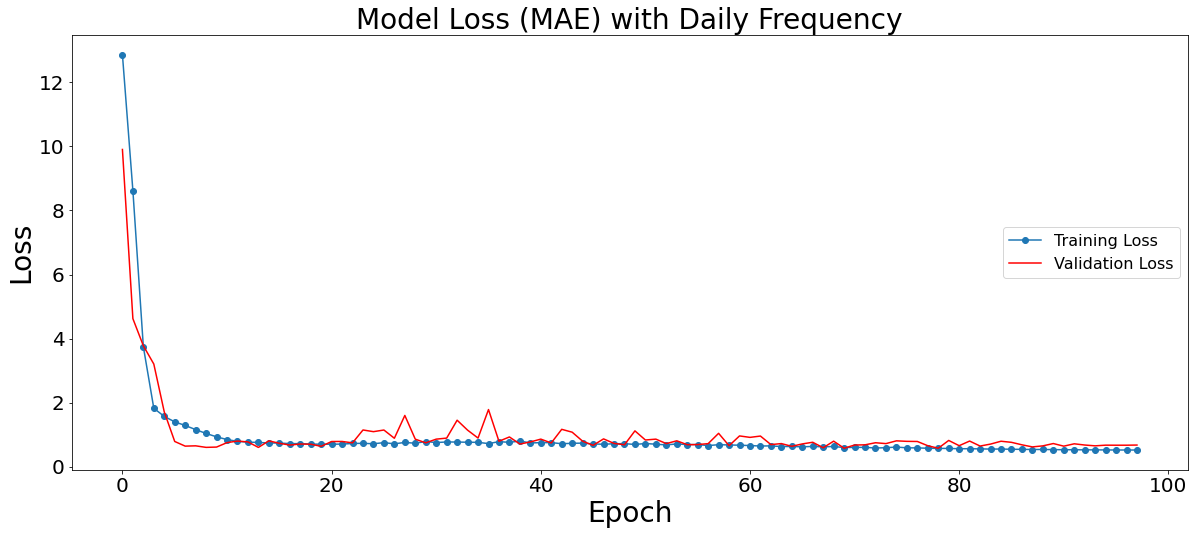

In [24]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(metrics["MAE"], '-o', label="Training Loss")  
ax.plot(metrics["MAE_val"], '-r', label="Validation Loss")
ax.legend(loc='center right', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel("Epoch", fontsize=28)
ax.set_ylabel("Loss", fontsize=28)
ax.set_title("Model Loss (MAE) with Daily Frequency", fontsize=28)